In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from shutil import copyfile
import matplotlib.pyplot as plt
import random
from keras.preprocessing import image
from google.colab import files
from tensorflow.keras.preprocessing import image

#visualization
import seaborn as sns

#system libraries
from pathlib import Path

In [ ]:
data_path = "/content/drive/My Drive/archive.zip"
extracted_path = "/content/dataImages"

with zipfile.ZipFile(data_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)


In [ ]:
source_path = "/content/dataImages"

source_path_ants = os.path.join(source_path, 'ants')
source_path_bees = os.path.join(source_path, 'bees')
source_path_beetle = os.path.join(source_path, 'beetle')
source_path_catterpillar = os.path.join(source_path, 'catterpillar')
source_path_earthworms = os.path.join(source_path, 'earthworms')
source_path_earwig = os.path.join(source_path, 'earwig')
source_path_grasshopper = os.path.join(source_path, 'grasshopper')
source_path_moth = os.path.join(source_path, 'moth')
source_path_slug = os.path.join(source_path, 'slug')
source_path_snail = os.path.join(source_path, 'snail')
source_path_wasp = os.path.join(source_path, 'wasp')
source_path_weevil = os.path.join(source_path, 'weevil')

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_ants))} images of ants.")
print(f"There are {len(os.listdir(source_path_bees))} images of bees.")
print(f"There are {len(os.listdir(source_path_beetle))} images of beetles.")
print(f"There are {len(os.listdir(source_path_catterpillar))} images of catterpillars.")
print(f"There are {len(os.listdir(source_path_earthworms))} images of earthworms.")
print(f"There are {len(os.listdir(source_path_earwig))} images of earwigs.")
print(f"There are {len(os.listdir(source_path_grasshopper))} images of grasshoppers.")
print(f"There are {len(os.listdir(source_path_moth))} images of moths.")
print(f"There are {len(os.listdir(source_path_slug))} images of slugs.")
print(f"There are {len(os.listdir(source_path_snail))} images of snails.")
print(f"There are {len(os.listdir(source_path_wasp))} images of wasps.")
print(f"There are {len(os.listdir(source_path_weevil))} images of weevils.")

There are 499 images of ants.
There are 500 images of bees.
There are 416 images of beetles.
There are 434 images of catterpillars.
There are 323 images of earthworms.
There are 466 images of earwigs.
There are 485 images of grasshoppers.
There are 497 images of moths.
There are 391 images of slugs.
There are 500 images of snails.
There are 498 images of wasps.
There are 485 images of weevils.


In [ ]:
root_dir = '/content/data'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
  train_dir = os.path.join(root_path, 'training')
  test_dir  = os.path.join(root_path, 'test')
  os.makedirs(train_dir)
  os.makedirs(test_dir)

  pests = ['ants', 'bees', 'beetle', 'catterpillar', 'earthworms',
           'earwig', 'grasshopper', 'moth', 'slug', 'snail', 'wasp', 'weevil']

  for pest in pests:
      train_pest_dir = os.path.join(train_dir, pest)
      test_pest_dir = os.path.join(test_dir, pest)
      os.makedirs(train_pest_dir)
      os.makedirs(test_pest_dir)

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/data/training
/content/data/test
/content/data/training/grasshopper
/content/data/training/bees
/content/data/training/beetle
/content/data/training/catterpillar
/content/data/training/earwig
/content/data/training/weevil
/content/data/training/slug
/content/data/training/earthworms
/content/data/training/wasp
/content/data/training/moth
/content/data/training/snail
/content/data/training/ants
/content/data/test/grasshopper
/content/data/test/bees
/content/data/test/beetle
/content/data/test/catterpillar
/content/data/test/earwig
/content/data/test/weevil
/content/data/test/slug
/content/data/test/earthworms
/content/data/test/wasp
/content/data/test/moth
/content/data/test/snail
/content/data/test/ants


In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, TEST_DIR, SPLIT_SIZE):
    # Ensure directories exist
    if not os.path.exists(TRAINING_DIR):
        os.makedirs(TRAINING_DIR)
    if not os.path.exists(TEST_DIR):
        os.makedirs(TEST_DIR)

    # Get list of files in source directory
    files = os.listdir(SOURCE_DIR)
    random.shuffle(files)

    # Calculate split index
    split_index = int(len(files) * SPLIT_SIZE)
    train_files = files[:split_index]
    val_files = files[split_index:]

    # Copy files to training directory
    for file in train_files:
        source_path = os.path.join(SOURCE_DIR, file)
        destination_path = os.path.join(TRAINING_DIR, file)
        if os.path.getsize(source_path) > 0:
            copyfile(source_path, destination_path)
        else:
            print(f"{file} is zero length, so ignoring.")

    # Copy files to validation directory
    for file in val_files:
        source_path = os.path.join(SOURCE_DIR, file)
        destination_path = os.path.join(TEST_DIR, file)
        if os.path.getsize(source_path) > 0:
            copyfile(source_path, destination_path)
        else:
            print(f"{file} is zero length, so ignoring.")


In [ ]:
TRAINING_DIR = "/content/data/training/"
TEST_DIR = "/content/data/test/"
# Define paths for each pest
ANTS_SOURCE_DIR = "/content/dataImages/ants"
BEES_SOURCE_DIR = "/content/dataImages/bees"
BEETLE_SOURCE_DIR = "/content/dataImages/beetle"
CATTERPILLAR_SOURCE_DIR = "/content/dataImages/catterpillar"
EARTHWORMS_SOURCE_DIR = "/content/dataImages/earthworms"
EARWIG_SOURCE_DIR = "/content/dataImages/earwig"
GRASSHOPPER_SOURCE_DIR = "/content/dataImages/grasshopper"
MOTH_SOURCE_DIR = "/content/dataImages/moth"
SLUG_SOURCE_DIR = "/content/dataImages/slug"
SNAIL_SOURCE_DIR = "/content/dataImages/snail"
WASP_SOURCE_DIR = "/content/dataImages/wasp"
WEEVIL_SOURCE_DIR = "/content/dataImages/weevil"

# Define paths for training and validation for each pest
ANTS_TRAINING_DIR = os.path.join(TRAINING_DIR, "ants/")
ANTS_TEST_DIR = os.path.join(TEST_DIR, "ants/")
BEES_TRAINING_DIR = os.path.join(TRAINING_DIR, "bees/")
BEES_TEST_DIR = os.path.join(TEST_DIR, "bees/")
BEETLE_TRAINING_DIR = os.path.join(TRAINING_DIR, "beetle/")
BEETLE_TEST_DIR = os.path.join(TEST_DIR, "beetle/")
CATTERPILLAR_TRAINING_DIR = os.path.join(TRAINING_DIR, "catterpillar/")
CATTERPILLAR_TEST_DIR = os.path.join(TEST_DIR, "catterpillar/")
EARTHWORMS_TRAINING_DIR = os.path.join(TRAINING_DIR, "earthworms/")
EARTHWORMS_TEST_DIR = os.path.join(TEST_DIR, "earthworms/")
EARWIG_TRAINING_DIR = os.path.join(TRAINING_DIR, "earwig/")
EARWIG_TEST_DIR = os.path.join(TEST_DIR, "earwig/")
GRASSHOPPER_TRAINING_DIR = os.path.join(TRAINING_DIR, "grasshopper/")
GRASSHOPPER_TEST_DIR = os.path.join(TEST_DIR, "grasshopper/")
MOTH_TRAINING_DIR = os.path.join(TRAINING_DIR, "moth/")
MOTH_TEST_DIR = os.path.join(TEST_DIR, "moth/")
SLUG_TRAINING_DIR = os.path.join(TRAINING_DIR, "slug/")
SLUG_TEST_DIR = os.path.join(TEST_DIR, "slug/")
SNAIL_TRAINING_DIR = os.path.join(TRAINING_DIR, "snail/")
SNAIL_TEST_DIR = os.path.join(TEST_DIR, "snail/")
WASP_TRAINING_DIR = os.path.join(TRAINING_DIR, "wasp/")
WASP_TEST_DIR = os.path.join(TEST_DIR, "wasp/")
WEEVIL_TRAINING_DIR = os.path.join(TRAINING_DIR, "weevil/")
WEEVIL_TEST_DIR = os.path.join(TEST_DIR, "weevil/")


# Define proportion of images used for training
SPLIT_SIZE = 0.8

# Split data for each pest
split_data(ANTS_SOURCE_DIR, ANTS_TRAINING_DIR, ANTS_TEST_DIR, SPLIT_SIZE)
split_data(BEES_SOURCE_DIR, BEES_TRAINING_DIR, BEES_TEST_DIR, SPLIT_SIZE)
split_data(BEETLE_SOURCE_DIR, BEETLE_TRAINING_DIR, BEETLE_TEST_DIR, SPLIT_SIZE)
split_data(CATTERPILLAR_SOURCE_DIR, CATTERPILLAR_TRAINING_DIR, CATTERPILLAR_TEST_DIR, SPLIT_SIZE)
split_data(EARTHWORMS_SOURCE_DIR, EARTHWORMS_TRAINING_DIR, EARTHWORMS_TEST_DIR, SPLIT_SIZE)
split_data(EARWIG_SOURCE_DIR, EARWIG_TRAINING_DIR, EARWIG_TEST_DIR, SPLIT_SIZE)
split_data(GRASSHOPPER_SOURCE_DIR, GRASSHOPPER_TRAINING_DIR, GRASSHOPPER_TEST_DIR, SPLIT_SIZE)
split_data(MOTH_SOURCE_DIR, MOTH_TRAINING_DIR, MOTH_TEST_DIR, SPLIT_SIZE)
split_data(SLUG_SOURCE_DIR, SLUG_TRAINING_DIR, SLUG_TEST_DIR, SPLIT_SIZE)
split_data(SNAIL_SOURCE_DIR, SNAIL_TRAINING_DIR, SNAIL_TEST_DIR, SPLIT_SIZE)
split_data(WASP_SOURCE_DIR, WASP_TRAINING_DIR, WASP_TEST_DIR, SPLIT_SIZE)
split_data(WEEVIL_SOURCE_DIR, WEEVIL_TRAINING_DIR, WEEVIL_TEST_DIR, SPLIT_SIZE)

In [ ]:
# Print the original number of images for each pest
print(f"\nOriginal number of images for each pest:")
print(f"There are {len(os.listdir(ANTS_SOURCE_DIR))} images of ants")
print(f"There are {len(os.listdir(BEES_SOURCE_DIR))} images of bees")
print(f"There are {len(os.listdir(BEETLE_SOURCE_DIR))} images of beetles")
print(f"There are {len(os.listdir(CATTERPILLAR_SOURCE_DIR))} images of catterpillars")
print(f"There are {len(os.listdir(EARTHWORMS_SOURCE_DIR))} images of earthworms")
print(f"There are {len(os.listdir(EARWIG_SOURCE_DIR))} images of earwigs")
print(f"There are {len(os.listdir(GRASSHOPPER_SOURCE_DIR))} images of grasshoppers")
print(f"There are {len(os.listdir(MOTH_SOURCE_DIR))} images of moths")
print(f"There are {len(os.listdir(SLUG_SOURCE_DIR))} images of slugs")
print(f"There are {len(os.listdir(SNAIL_SOURCE_DIR))} images of snails")
print(f"There are {len(os.listdir(WASP_SOURCE_DIR))} images of wasps")
print(f"There are {len(os.listdir(WEEVIL_SOURCE_DIR))} images of weevils\n")

# Print the number of images for each pest in the training and test sets
print("Number of images for each pest in the training and test sets:")
print(f"There are {len(os.listdir(ANTS_TRAINING_DIR))} images of ants for training")
print(f"There are {len(os.listdir(BEES_TRAINING_DIR))} images of bees for training")
print(f"There are {len(os.listdir(BEETLE_TRAINING_DIR))} images of beetles for training")
print(f"There are {len(os.listdir(CATTERPILLAR_TRAINING_DIR))} images of catterpillars for training")
print(f"There are {len(os.listdir(EARTHWORMS_TRAINING_DIR))} images of earthworms for training")
print(f"There are {len(os.listdir(EARWIG_TRAINING_DIR))} images of earwigs for training")
print(f"There are {len(os.listdir(GRASSHOPPER_TRAINING_DIR))} images of grasshoppers for training")
print(f"There are {len(os.listdir(MOTH_TRAINING_DIR))} images of moths for training")
print(f"There are {len(os.listdir(SLUG_TRAINING_DIR))} images of slugs for training")
print(f"There are {len(os.listdir(SNAIL_TRAINING_DIR))} images of snails for training")
print(f"There are {len(os.listdir(WASP_TRAINING_DIR))} images of wasps for training")
print(f"There are {len(os.listdir(WEEVIL_TRAINING_DIR))} images of weevils for training\n")

print(f"There are {len(os.listdir(ANTS_TEST_DIR))} images of ants for test")
print(f"There are {len(os.listdir(BEES_TEST_DIR))} images of bees for test")
print(f"There are {len(os.listdir(BEETLE_TEST_DIR))} images of beetles for test")
print(f"There are {len(os.listdir(CATTERPILLAR_TEST_DIR))} images of catterpillars for test")
print(f"There are {len(os.listdir(EARTHWORMS_TEST_DIR))} images of earthworms for test")
print(f"There are {len(os.listdir(EARWIG_TEST_DIR))} images of earwigs for test")
print(f"There are {len(os.listdir(GRASSHOPPER_TEST_DIR))} images of grasshoppers for test")
print(f"There are {len(os.listdir(MOTH_TEST_DIR))} images of moths for test")
print(f"There are {len(os.listdir(SLUG_TEST_DIR))} images of slugs for test")
print(f"There are {len(os.listdir(SNAIL_TEST_DIR))} images of snails for test")
print(f"There are {len(os.listdir(WASP_TEST_DIR))} images of wasps for test")
print(f"There are {len(os.listdir(WEEVIL_TEST_DIR))} images of weevils for test")



Original number of images for each pest:
There are 499 images of ants
There are 500 images of bees
There are 416 images of beetles
There are 434 images of catterpillars
There are 323 images of earthworms
There are 466 images of earwigs
There are 485 images of grasshoppers
There are 497 images of moths
There are 391 images of slugs
There are 500 images of snails
There are 498 images of wasps
There are 485 images of weevils

Number of images for each pest in the training and test sets:
There are 399 images of ants for training
There are 400 images of bees for training
There are 332 images of beetles for training
There are 347 images of catterpillars for training
There are 258 images of earthworms for training
There are 372 images of earwigs for training
There are 388 images of grasshoppers for training
There are 397 images of moths for training
There are 312 images of slugs for training
There are 400 images of snails for training
There are 398 images of wasps for training
There are 388 

In [ ]:
def train_val_generators(TRAINING_DIR, TEST_DIR):
  # Instantiate the ImageDataGenerator class
  train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2,
    horizontal_flip=True
  )

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='binary',
                                                      subset='training',
                                                      target_size=(224, 224))

  validation_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    subset='validation',
                                                    target_size=(224, 224))

  # Instantiate the ImageDataGenerator class
  test_datagen = ImageDataGenerator(
      rescale=1/255,
  )

  # Pass in the appropriate arguments to the flow_from_directory method
  test_generator = test_datagen.flow_from_directory(directory=TEST_DIR,
                                                      batch_size=32,
                                                      class_mode='binary',
                                                      target_size=(224, 224))
  return train_generator, validation_generator, test_generator

In [ ]:
train_generator, validation_generator, test_generator = train_val_generators(TRAINING_DIR, TEST_DIR)

Found 3518 images belonging to 12 classes.
Found 873 images belonging to 12 classes.
Found 1103 images belonging to 12 classes.


In [ ]:
def create_model():

  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(12, activation='softmax')
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.sparse_categorical_crossentropy,
                metrics=['accuracy'])


  return model

In [ ]:
model = create_model()

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') >= 0.9:
            print("\nReached 90% validation accuracy, stopping training.")
            self.model.stop_training = True

my_callback = MyCallback()

history = model.fit(train_generator,
                    epochs=200,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=[my_callback])

Epoch 1/200
35/35 [==============================] - 77s 2s/step - loss: 5.1338 - accuracy: 0.1560 - val_loss: 2.9017 - val_accuracy: 0.0771
Epoch 2/200
35/35 [==============================] - 64s 2s/step - loss: 3.4119 - accuracy: 0.1911 - val_loss: 3.5991 - val_accuracy: 0.0870
Epoch 3/200
35/35 [==============================] - 64s 2s/step - loss: 2.9822 - accuracy: 0.2091 - val_loss: 4.2897 - val_accuracy: 0.0879
Epoch 4/200
35/35 [==============================] - 67s 2s/step - loss: 2.6322 - accuracy: 0.2343 - val_loss: 2.8260 - val_accuracy: 0.0907
Epoch 5/200
35/35 [==============================] - 64s 2s/step - loss: 2.4813 - accuracy: 0.2592 - val_loss: 2.7549 - val_accuracy: 0.1142
Epoch 6/200
35/35 [==============================] - 64s 2s/step - loss: 2.2838 - accuracy: 0.2890 - val_loss: 2.9451 - val_accuracy: 0.1034
Epoch 7/200
35/35 [==============================] - 65s 2s/step - loss: 2.1869 - accuracy: 0.3093 - val_loss: 3.3170 - val_accuracy: 0.1088
Epoch 8/200
3

KeyboardInterrupt: 

In [ ]:
from keras.applications import Xception
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

83683744/83683744 [==============================] - 2s 0us/step


In [ ]:
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(12,activation='softmax'),
])

model.summary()

model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
              metrics=['accuracy']
             )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dense_1 (Dense)             (None, 12)                3084      
                                                                 
Total params: 46554932 (177.59 MB)
Trainable params: 25693452 (98.01 MB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________


In [ ]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator
)

Epoch 1/15
110/110 [==============================] - 85s 693ms/step - loss: 3.5858 - accuracy: 0.6745 - val_loss: 0.8340 - val_accuracy: 0.7320
Epoch 2/15
110/110 [==============================] - 66s 597ms/step - loss: 0.7922 - accuracy: 0.7698 - val_loss: 0.6663 - val_accuracy: 0.8030
Epoch 3/15
110/110 [==============================] - 64s 581ms/step - loss: 0.6837 - accuracy: 0.7979 - val_loss: 0.8697 - val_accuracy: 0.7388
Epoch 4/15
110/110 [==============================] - 66s 597ms/step - loss: 0.6004 - accuracy: 0.8260 - val_loss: 0.6880 - val_accuracy: 0.8087
Epoch 5/15
110/110 [==============================] - 63s 576ms/step - loss: 0.5515 - accuracy: 0.8348 - val_loss: 0.6828 - val_accuracy: 0.7938
Epoch 6/15
110/110 [==============================] - 66s 603ms/step - loss: 0.5386 - accuracy: 0.8314 - val_loss: 0.8057 - val_accuracy: 0.7698
Epoch 7/15
110/110 [==============================] - 73s 662ms/step - loss: 0.5176 - accuracy: 0.8439 - val_loss: 0.6467 - val_ac

In [ ]:
results = model.evaluate(test_generator, verbose=0)

print(" Test Loss     :  {:.5f}".format(results[0]))
print(" Test Accuracy :  {:.2f}%".format(results[1] * 100))

 Test Loss     :  0.58475
 Test Accuracy :  84.04%


#Visualizing loss curves

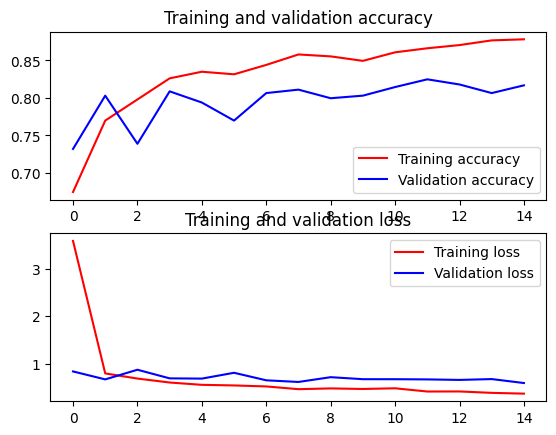

In [ ]:
def plot_history(history):
    # Extract the accuracy and loss values for both training and validation from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    # Create a figure with a specified size
    # plt.figure(figsize=(12, 8))

    # Plot training and validation accuracy on the first subplot
    plt.subplot(2, 1, 1)
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    # Plot training and validation loss on the second subplot
    plt.subplot(2, 1, 2)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    # Show the plots
    plt.show()
plot_history(history)

1/1 [==============================] - 0s 32ms/step


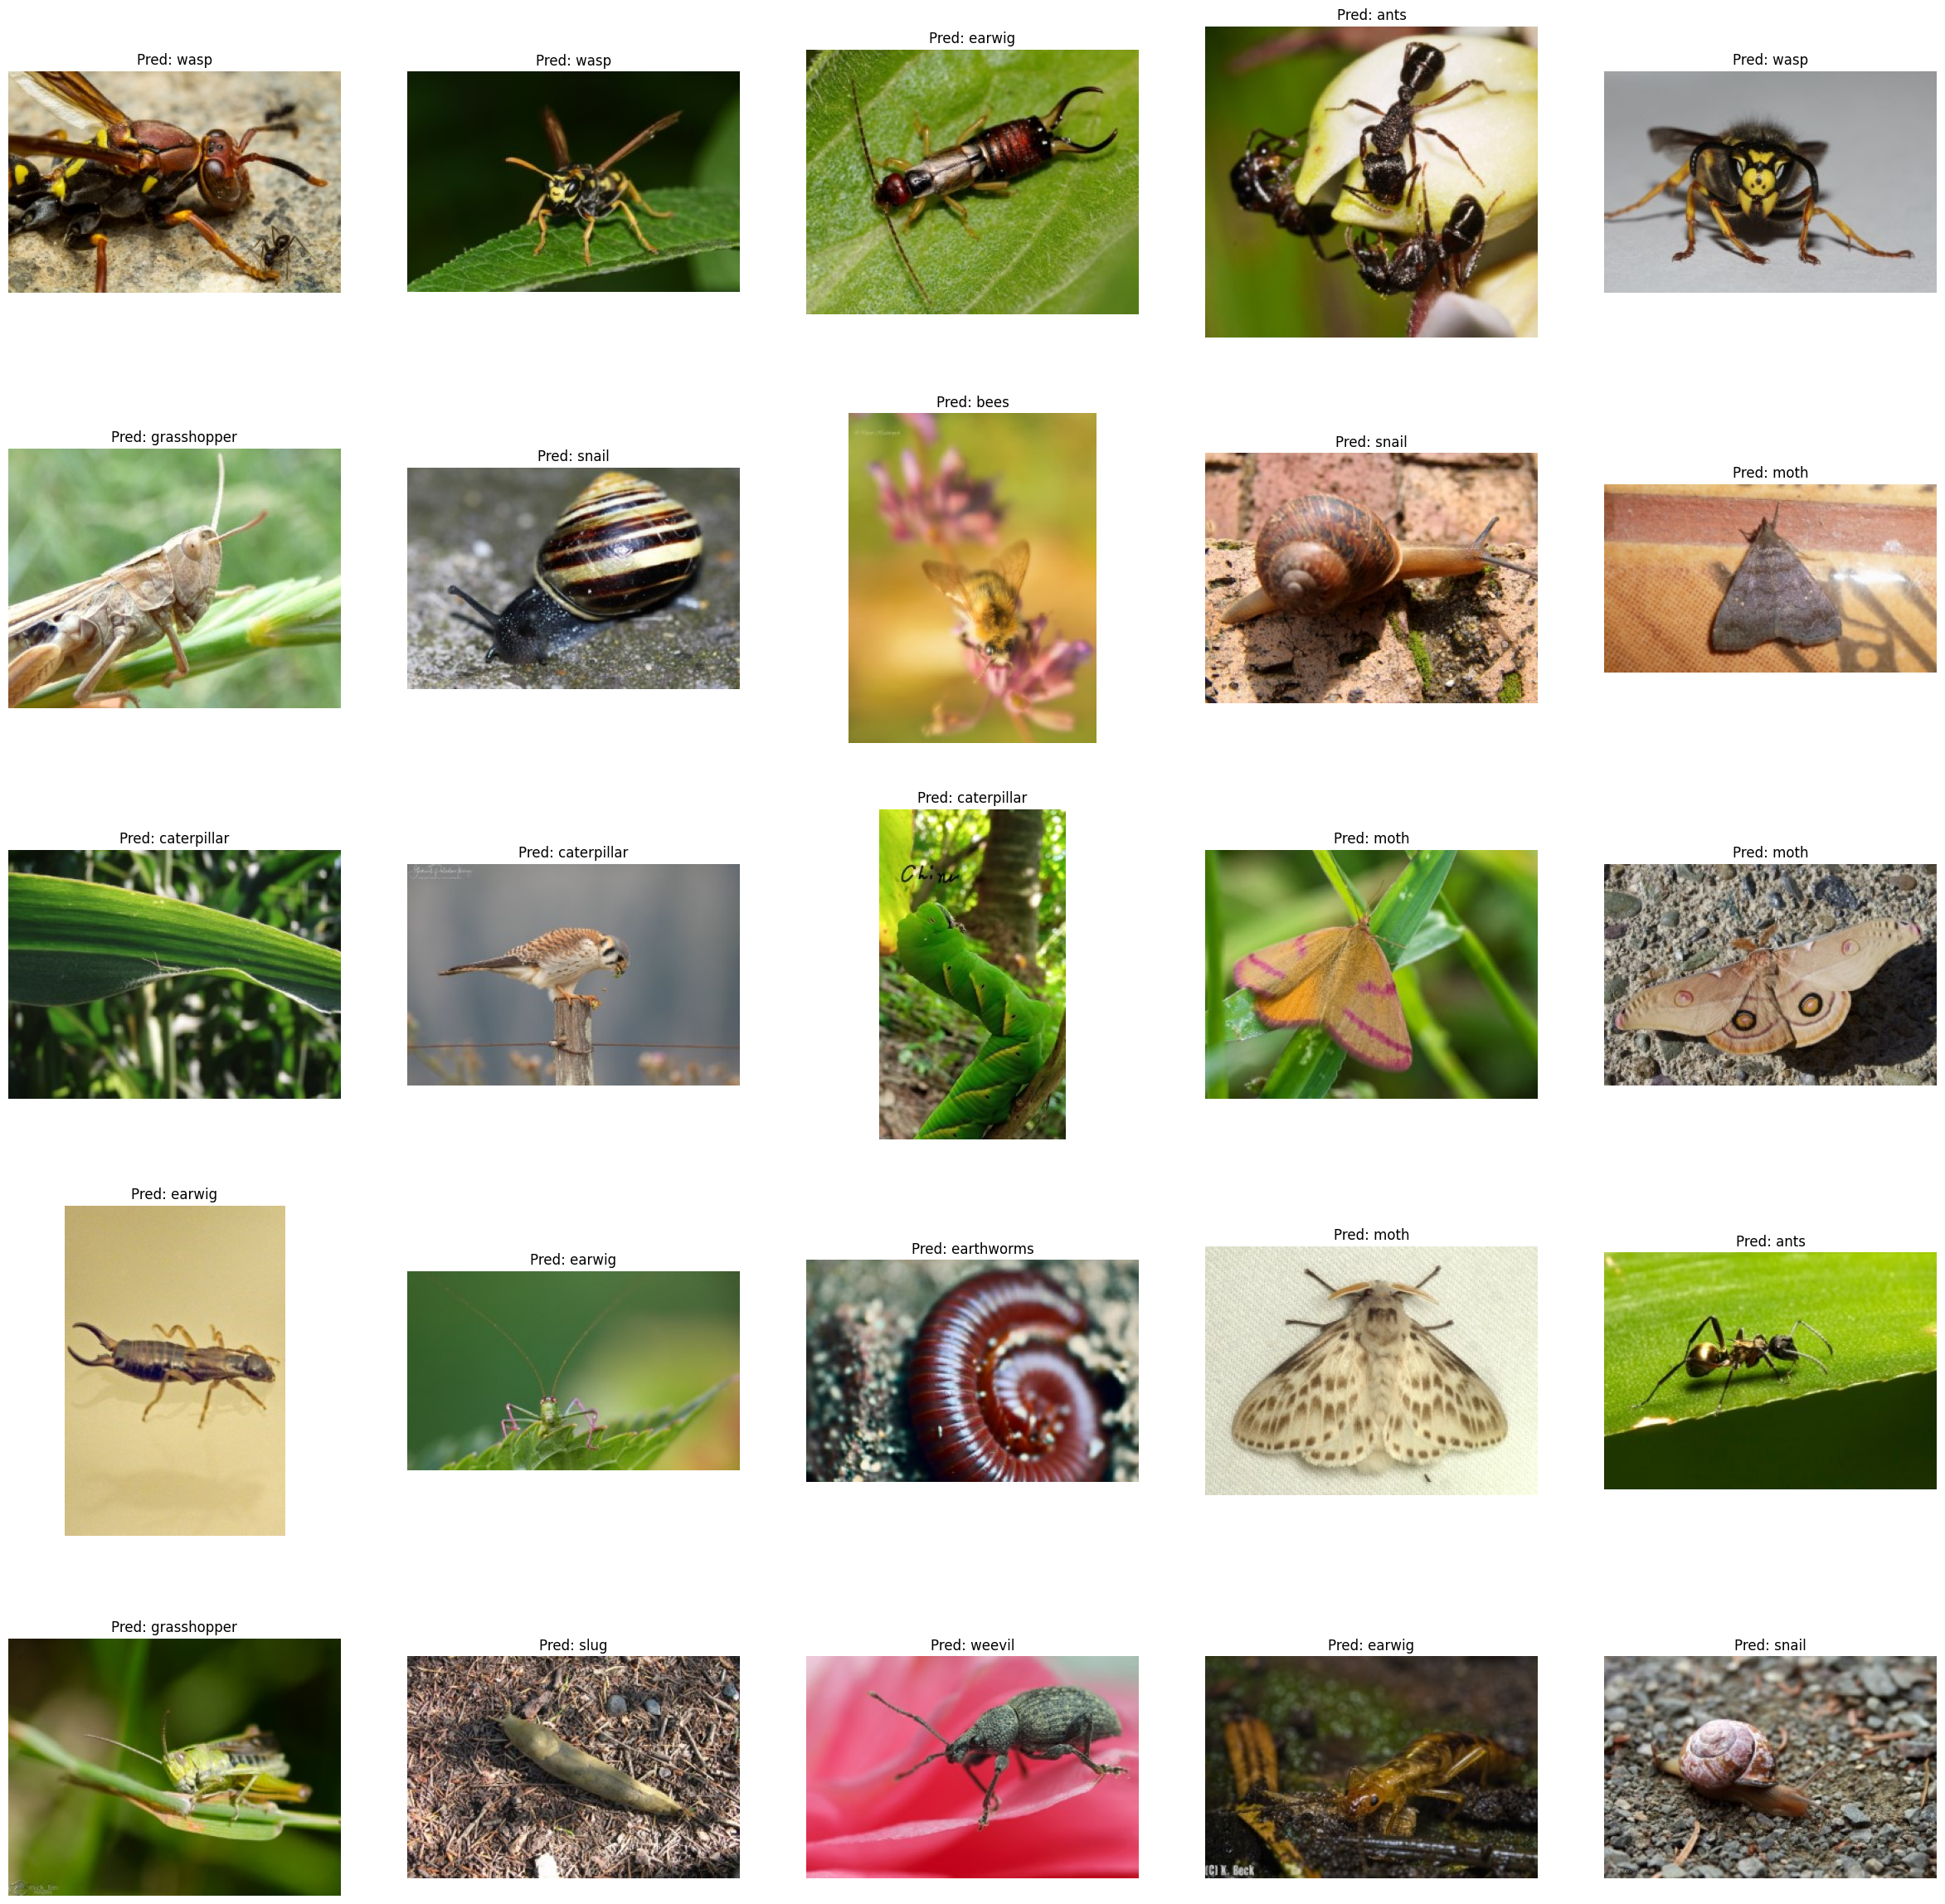

In [ ]:
# Select 25 random images from the test generator
random_images = random.sample(test_generator.filenames, 25)

images = [] # Initialize images list to store loaded images
labels = test_generator.class_indices # Get the class labels from the generator

# Show the images with the label
for image_path in random_images:
    # Load the image
    img_path = "/content/data/test/" + image_path
    img = load_img(img_path, target_size=(224, 224))  # Assuming the model expects 224x224 images
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dims to fit the model input
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)  # Preprocess the image
    images.append(img_array)

images_batch = np.vstack(images)
predictions = model.predict(images_batch)

labels = {
    1: "ants",
    2: "bees",
    3: "beetle",
    4: "caterpillar",
    5: "earthworms",
    6: "earwig",
    7: "grasshopper",
    8: "moth",
    9: "slug",
    10: "snail",
    11: "wasp",
    12: "weevil"
}

# Display the images with their predictions
plt.figure(figsize=(30, 30))
for i, img_path in enumerate(random_images):
  img = plt.imread("/content/data/test/" + img_path) # Construct the full image path
  plt.subplot(5, 5, i + 1)  # Adjust the subplot size according to the number of images
  plt.imshow(img)
  prediction_label = labels.get(np.argmax(predictions[i]) + 1, "Unknown")  # Get the corresponding label
  plt.title(f"Pred: {prediction_label}")
  plt.axis('off')

plt.show()

Saving OIP (5).jpeg to OIP (5).jpeg
1/1 [==============================] - 0s 21ms/step
[[9.9999046e-01 4.0994337e-07 7.4388549e-07 2.4960542e-07 6.7190136e-08
  3.8083106e-06 1.7391923e-08 3.9241390e-16 1.9651111e-07 3.4053530e-13
  4.0755094e-06 1.1388120e-08]]


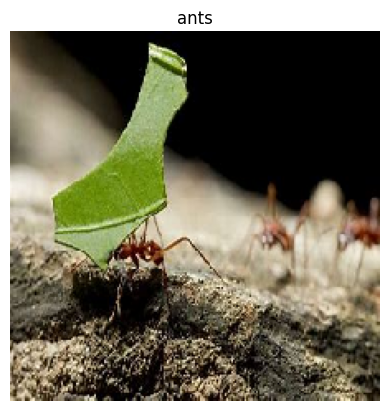

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = tf.keras.applications.mobilenet_v2.preprocess_input(x)  # Preprocess the image

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)
  plt.imshow(img)
  plt.title(labels[np.argmax(classes[0]) + 1])
  plt.axis('off')
  plt.show()